In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('conhecimento_filtrado.csv')
print(len(df))

82053


In [6]:
df1 = df[df.verifica==1].copy()
print(len(df1))
df3 = df[df.verifica==3].copy()
print(len(df3))

12893
58764


In [3]:
cols = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3',
       'medianb4', 'medianb5', 'medianb6', 'medianb7']

In [7]:
dados = []
for c in cols:
    mi = df1[c].min()
    ma = df1[c].max()
    d = ((df1[c]-mi) / (ma-mi))
    dados.append([
        c, # coluna
        d.mean(),   # media
        d.median(), # mediana
        d.std()**2, # variancia
        d.std(),    # std
    ])

In [10]:
sumario = pd.DataFrame(dados, columns=['coluna', 'media', 'mediana', 'variancia', 'std'])
sumario = sumario.sort_values('std', ascending=False).copy().reset_index(drop=True)
sumario

,coluna,media,mediana,variancia,std
0,dif_ndvi,0.366613,0.329117,0.033906,0.184137
1,medianb7,0.467894,0.462550,0.028318,0.168280
2,dif_dnbrl,0.261435,0.228920,0.026886,0.163969
3,medianb5,0.496806,0.498345,0.024812,0.157517
4,ndvi,0.444477,0.440315,0.024691,0.157132
5,nbrl,0.476658,0.460639,0.024593,0.156820
6,medianb3,0.373159,0.364238,0.019846,0.140875
7,medianb4,0.386198,0.372567,0.019754,0.140550
8,medianb6,0.419812,0.416517,0.015310,0.123732
9,medianb2,0.281057,0.264648,0.013282,0.115248


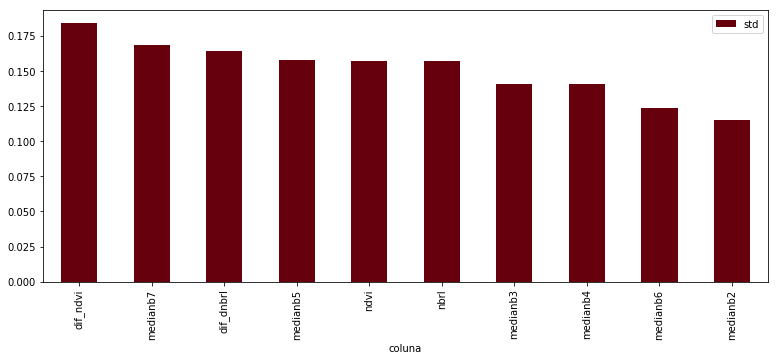

In [11]:
sumario.plot(x="coluna", y=['std'], kind="bar", colormap='Reds_r', figsize=(13,5))

In [92]:
#(x-min) / (max-min)

In [14]:
melhor = sumario.coluna.loc[0]
pior = sumario.coluna.loc[len(sumario)-1]

dado discrepante melhor coluna dif_ndvi


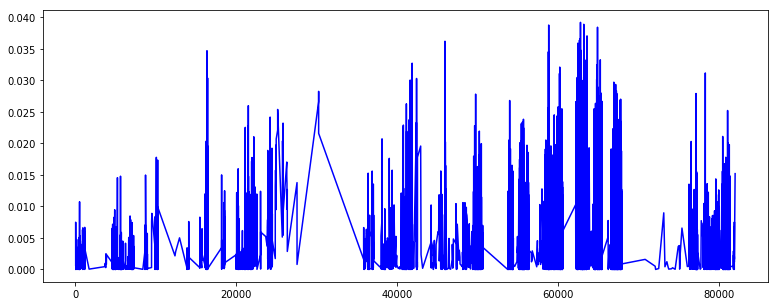

In [15]:
((df1[melhor]-df1[melhor].mean())**2).plot(c='b', figsize=(13,5))
print('dado discrepante melhor coluna', melhor)

dado discrepante pior coluna medianb2


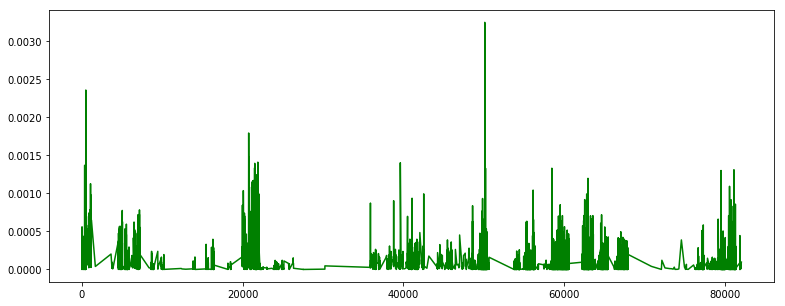

In [16]:
((df1[pior]-df1[pior].mean())**2).plot(c='g', figsize=(13,5))
print('dado discrepante pior coluna', pior)

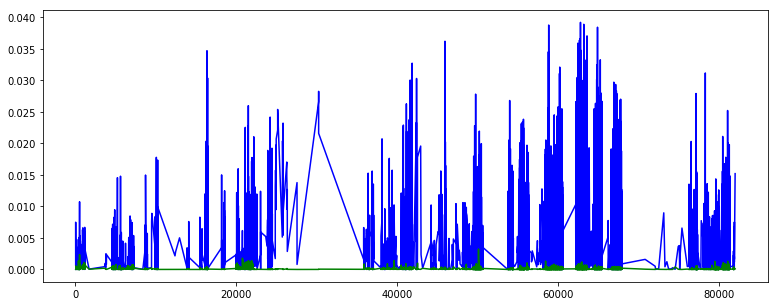

In [17]:
((df1[melhor]-df1[melhor].mean())**2).plot(c='b', figsize=(13,5))
((df1[pior]-df1[pior].mean())**2).plot(c='g', figsize=(13,5))
